In [489]:
import yfinance as yf
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt

import statsmodels.api as sm
import pylab
from scipy.stats import skew, kurtosis, jarque_bera
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [490]:
plt.style.use('seaborn')

/tmp/ipykernel_5141/2955780531.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [491]:
exchange_path = 'results/tstr_log-8/'
msft_path = 'results/tstr_log-9/'
aapl_path = 'results/tstr_log-11/'
btc_path = 'results/tstr_log-12/'
gspc_path = 'results/tstr_log-13/'
stocks_path = 'results/tstr_log-10/'

In [492]:
data_path = exchange_path

In [493]:
real = np.load(data_path + 'real_samples.npy')
synth = np.load(data_path + 'synth_samples.npy')

In [494]:
real.shape

(10000, 390)

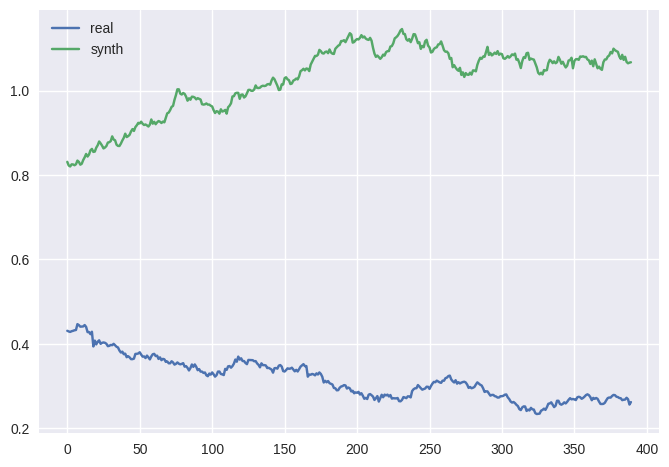

In [495]:
plt.plot(real[0]**2, label='real')
plt.plot(synth[0]**2, label='synth')
plt.legend()

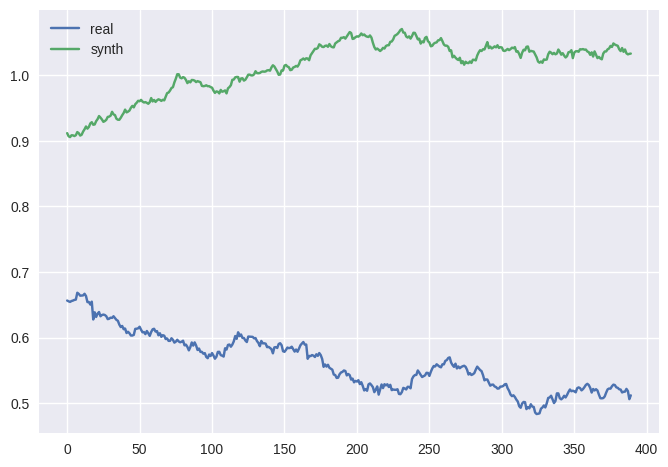

In [496]:
plt.plot(real[0], label='real')
plt.plot(synth[0], label='synth')
plt.legend()

(array([21., 50., 76., 53., 34., 64., 47., 17., 10., 18.]),
 array([0.48329699, 0.50179672, 0.52029639, 0.53879607, 0.5572958 ,
        0.57579553, 0.5942952 , 0.61279488, 0.63129461, 0.64979434,
        0.66829401]),
 <BarContainer object of 10 artists>)

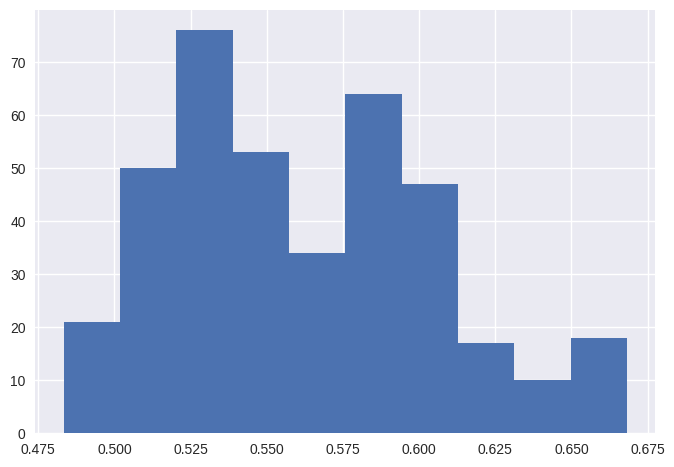

In [497]:
plt.hist(real[0], label='real')

(array([16., 19., 12., 22., 27., 39., 36., 81., 94., 44.]),
 array([0.90573853, 0.92222333, 0.93870813, 0.95519292, 0.97167772,
        0.98816252, 1.00464737, 1.02113211, 1.03761697, 1.05410171,
        1.07058656]),
 <BarContainer object of 10 artists>)

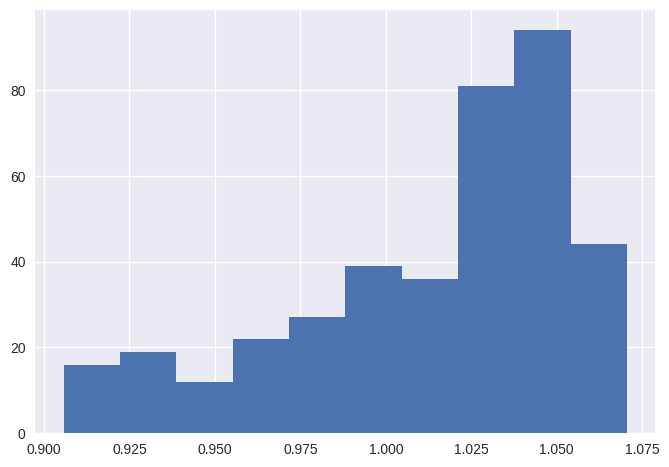

In [498]:
plt.hist(synth[0], label='synth')

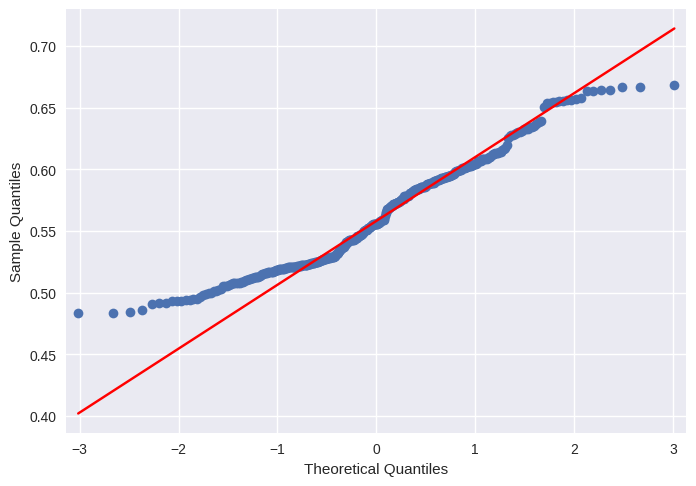

In [499]:
sm.qqplot(real[0], line='q', a=1/2)
pylab.show()

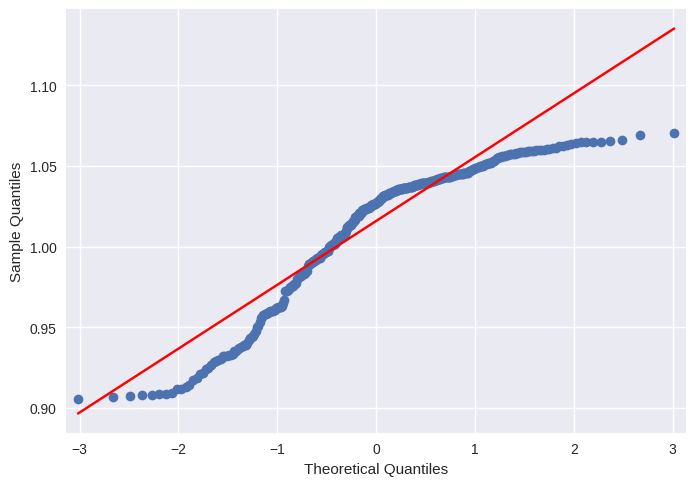

In [500]:
sm.qqplot(synth[0], line='q', a=1/2)
pylab.show()

In [501]:
mean_ret = np.mean(real[0])
std_dev_ret = np.std(real[0])
skewness_ret = skew(real[0])
kurtosis_ret = kurtosis(real[0])  # This function returns excess kurtosis by default

print("real: Sample Mean:", mean_ret)
print("real: Sample Standard Deviation:", std_dev_ret)
print("real: Sample Skewness:", skewness_ret)
print("real: Sample Kurtosis:", kurtosis_ret)

jb_test = jarque_bera(real[0])
print("real: Jarque-Bera test statistic:", jb_test.statistic)
print("real: Jarque-Bera test p-value:", jb_test.pvalue)


real: Sample Mean: 0.5615343
real: Sample Standard Deviation: 0.043321356
real: Sample Skewness: 0.40452093251518045
real: Sample Kurtosis: -0.6337625818004509
real: Jarque-Bera test statistic: 17.163271485769435
real: Jarque-Bera test p-value: 0.00018751799517643624


In [502]:
mean_ret = np.mean(synth[0])
std_dev_ret = np.std(synth[0])
skewness_ret = skew(synth[0])
kurtosis_ret = kurtosis(synth[0])  # This function returns excess kurtosis by default

print("synthetic: Sample Mean:", mean_ret)
print("synthetic: Sample Standard Deviation:", std_dev_ret)
print("synthetic: Sample Skewness:", skewness_ret)
print("synthetic: Sample Kurtosis:", kurtosis_ret)

jb_test = jarque_bera(synth[0])
print("synthetic: Jarque-Bera test statistic:", jb_test.statistic)
print("synthetic: Jarque-Bera test p-value:", jb_test.pvalue)

synthetic: Sample Mean: 1.0123448
synthetic: Sample Standard Deviation: 0.041363
synthetic: Sample Skewness: -0.9197419044457817
synthetic: Sample Kurtosis: -0.15400059699233903
synthetic: Jarque-Bera test statistic: 55.3701739569105
synthetic: Jarque-Bera test p-value: 9.473697082842622e-13


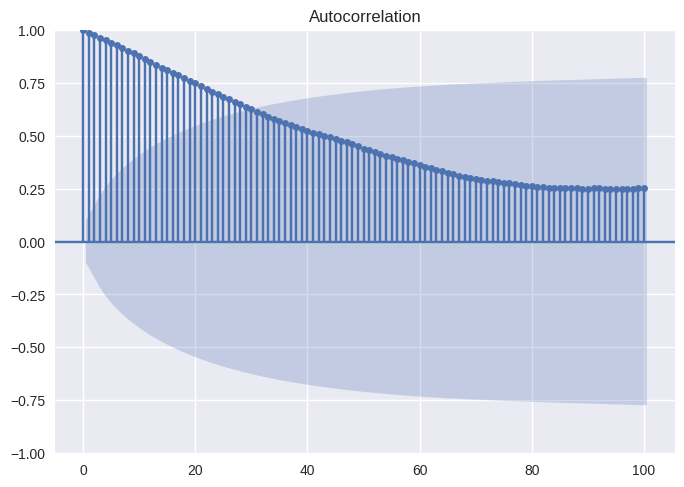

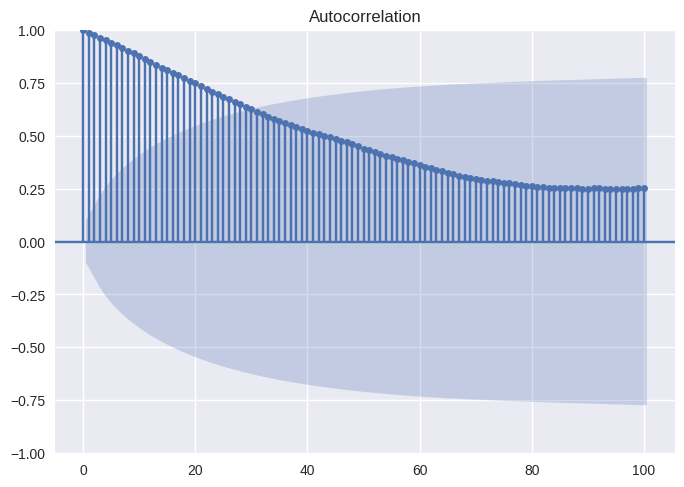

In [503]:
plot_acf(real[0], lags=100)

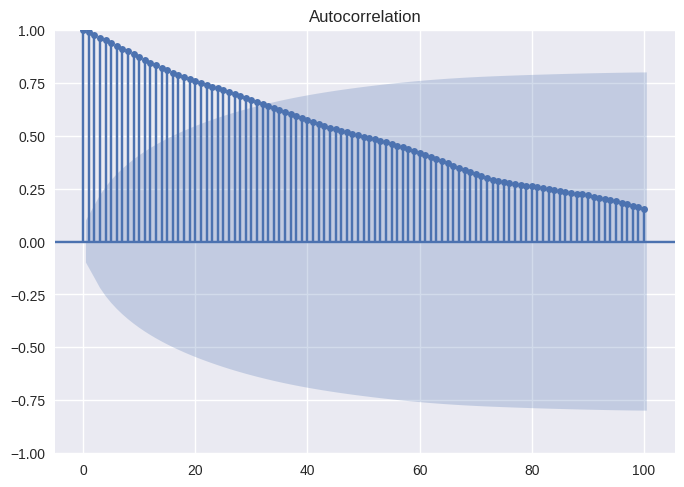

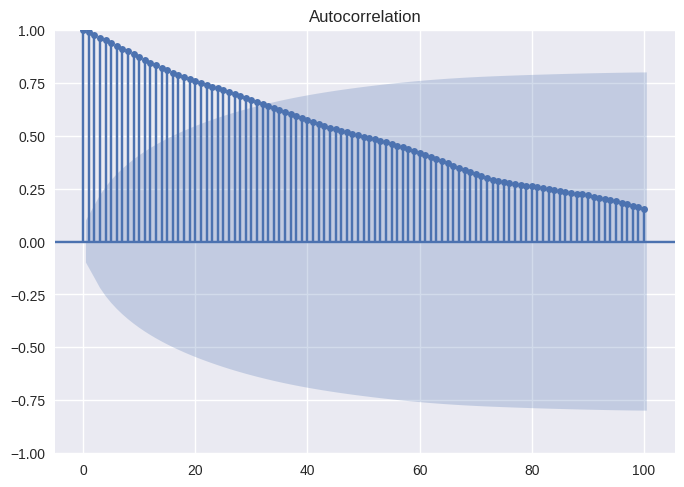

In [504]:
plot_acf(synth[0], lags=100)

In [505]:
# Calculate Ljung-Box Q statistic for lags 1 to 10
results = acorr_ljungbox(real[0], lags=10, return_df=True)
print("Ljung-Box Q statistic")
# Print the results
for lag in range(1, 11):
    print(f"real: Lag: {lag}, Statistic: {results.loc[lag, 'lb_stat']}, p-value: {results.loc[lag, 'lb_pvalue']}")

Ljung-Box Q statistic
real: Lag: 1, Statistic: 382.5069415891259, p-value: 3.5413212628314705e-85
real: Lag: 2, Statistic: 756.3806397256183, p-value: 5.675850847524423e-165
real: Lag: 3, Statistic: 1121.8813463322726, p-value: 6.514200030620819e-243
real: Lag: 4, Statistic: 1479.8083192587542, p-value: 0.0
real: Lag: 5, Statistic: 1830.0499470855734, p-value: 0.0
real: Lag: 6, Statistic: 2172.29619157683, p-value: 0.0
real: Lag: 7, Statistic: 2506.706400158716, p-value: 0.0
real: Lag: 8, Statistic: 2831.8611052125034, p-value: 0.0
real: Lag: 9, Statistic: 3148.787148334558, p-value: 0.0
real: Lag: 10, Statistic: 3457.094355765856, p-value: 0.0


In [506]:
# Calculate Ljung-Box Q statistic for lags 1 to 10
results = acorr_ljungbox(synth[0], lags=10, return_df=True)
print("Ljung-Box Q statistic")


# Print the results
for lag in range(1, 11):
    print(f"synthetic: Lag: {lag}, Statistic: {results.loc[lag, 'lb_stat']}, p-value: {results.loc[lag, 'lb_pvalue']}")



Ljung-Box Q statistic
synthetic: Lag: 1, Statistic: 383.96187397573993, p-value: 1.7076962702366302e-85
synthetic: Lag: 2, Statistic: 759.3731946050291, p-value: 1.271176743942584e-165
synthetic: Lag: 3, Statistic: 1125.7068574981695, p-value: 9.63606621574567e-244
synthetic: Lag: 4, Statistic: 1483.1629807179638, p-value: 0.0
synthetic: Lag: 5, Statistic: 1831.9027296673246, p-value: 0.0
synthetic: Lag: 6, Statistic: 2171.792460168021, p-value: 0.0
synthetic: Lag: 7, Statistic: 2502.740222768553, p-value: 0.0
synthetic: Lag: 8, Statistic: 2825.514889960066, p-value: 0.0
synthetic: Lag: 9, Statistic: 3139.8230592987325, p-value: 0.0
synthetic: Lag: 10, Statistic: 3444.952101202906, p-value: 0.0


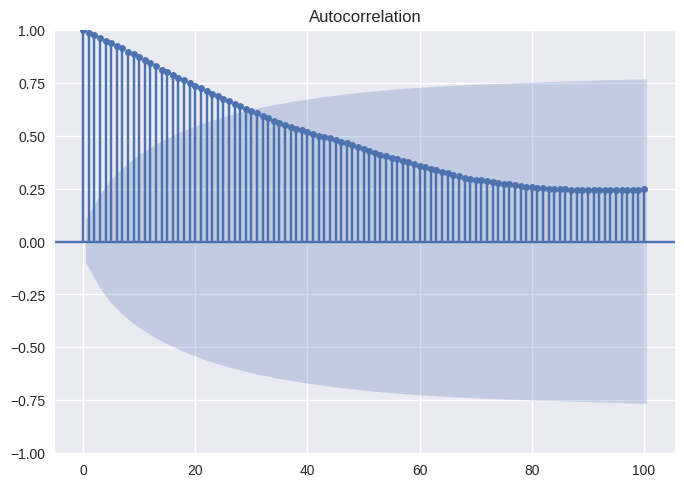

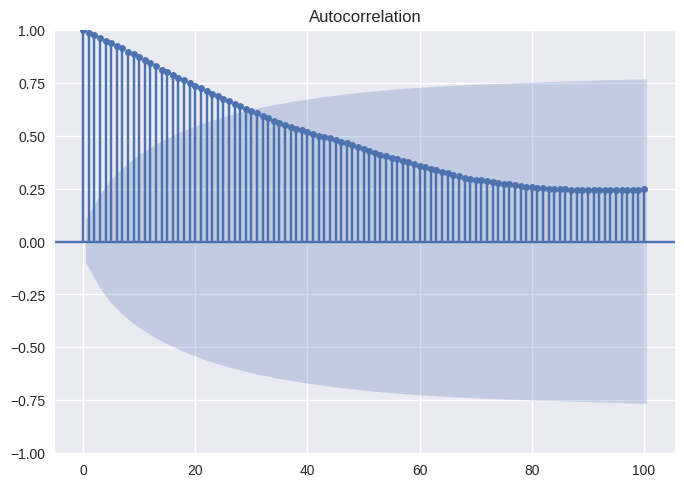

In [507]:
plot_acf(real[0]**2, lags=100)

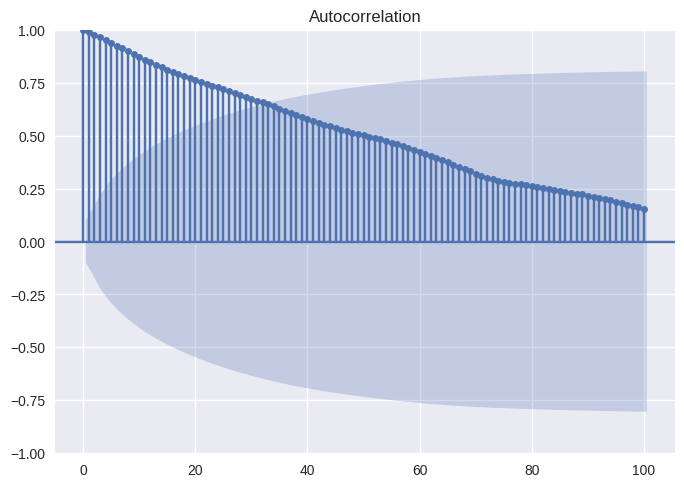

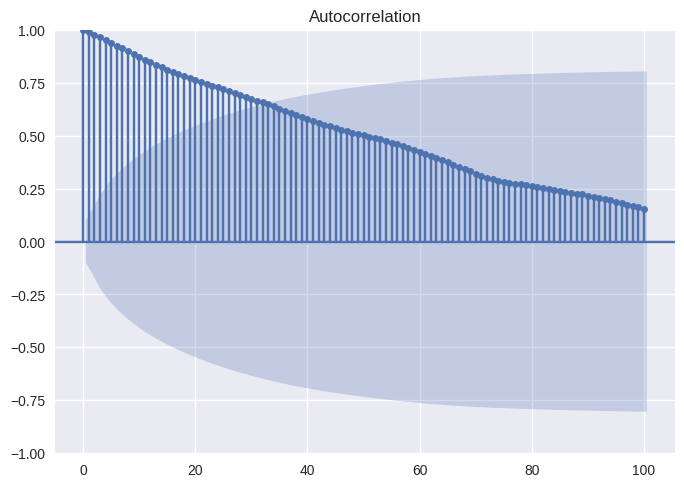

In [508]:
plot_acf(synth[0]**2, lags=100)